In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import cv2
import sklearn
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# Introduction to Convolution neural network and Computer vision with Tensorflow

Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front

## Inspect the data 



In [2]:
import os 
 # Walk through pizza_steak dir 

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak\test'.
There are 0 directories and 250 images in 'pizza_steak\test\pizza'.
There are 0 directories and 250 images in 'pizza_steak\test\steak'.
There are 2 directories and 0 images in 'pizza_steak\train'.
There are 0 directories and 750 images in 'pizza_steak\train\pizza'.
There are 0 directories and 750 images in 'pizza_steak\train\steak'.


In [5]:
# Get the classnames programmaticaly 

import pathlib 
import numpy as np
data_dir=pathlib.Path("pizza_steak/train/")
class_names=np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['pizza' 'steak']


In [22]:
# Let's visualize our images
import random
import matplotlib.image as mpimg
def view_random_image(target_dir, target_class):
    # Setup the target directory
    target_folder=target_dir+target_class
    
    # Get a random image path
    random_image=random.sample(os.listdir(target_folder),1)
    print(random_image)
    
    # Read the image and plot
    img=mpimg.imread(target_folder+"/"+random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")
    
    print(f"Image shape: {img.shape}")
    
    return img
    
    

['1493169.jpg']
Image shape: (512, 512, 3)


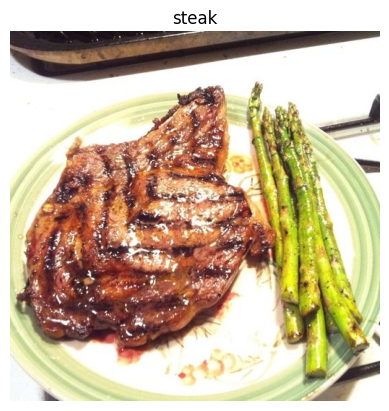

In [27]:
# view the random image from the training dataset

img=view_random_image(target_dir="pizza_steak/train/",target_class="steak")

In [29]:
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 60,  45,  50],
        [ 57,  42,  47],
        [ 52,  39,  46],
        ...,
        [ 71,  67,  56],
        [ 74,  70,  59],
        [ 78,  74,  63]],

       [[ 62,  47,  52],
        [ 58,  43,  48],
        [ 52,  39,  46],
        ...,
        [ 78,  74,  63],
        [ 79,  75,  64],
        [ 81,  77,  66]],

       [[ 58,  43,  48],
        [ 57,  42,  47],
        [ 52,  39,  46],
        ...,
        [ 79,  75,  66],
        [ 79,  76,  67],
        [ 79,  76,  67]],

       ...,

       [[248, 252, 251],
        [247, 251, 250],
        [247, 251, 250],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[248, 252, 251],
        [247, 251, 250],
        [247, 251, 250],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[248, 252, 251],
        [247, 251, 250],
        [247, 251, 250],
        ...,
        [255, 255, 25

## An end-to-end example 

Let's build a convolutional neural network to find patterns in our images, mpore specifically we need a way to:

* load our images
* preprocess our images 
* build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training

In [33]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set seed
tf.random.set_seed(42)

# Preprocess data (Normalization => Get all pixels values between 1 & 0)
train_datagen= ImageDataGenerator(rescale=1./255)
valid_datagen=ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories 
train_dir="/tensorflow_coursse/pizza_steak/train/"
test_dir="/tensorflow_coursse/pizza_steak/test/"



# Import data from directories and turn it into batches
train_data=train_datagen.flow_from_directory(train_dir, 
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             seed=42)
test_data=valid_datagen.flow_from_directory(test_dir,
                                            batch_size=32,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [34]:
# Build a CNN model (same as tine VGG)
model= tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")   
])

# Compile our model
model.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit model 

history = model.fit(train_data,
                    epochs=5,
                    steps_per_epoch=len(train_data),
                    validation_data=test_data,
                    validation_steps=len(test_data))


Epoch 1/5
47/47 [==============================] - 20s 365ms/step - loss: 0.5954 - accuracy: 0.6933 - val_loss: 0.4852 - val_accuracy: 0.7780
Epoch 2/5
47/47 [==============================] - 8s 167ms/step - loss: 0.4391 - accuracy: 0.7933 - val_loss: 0.3667 - val_accuracy: 0.8520
Epoch 3/5
47/47 [==============================] - 8s 174ms/step - loss: 0.3958 - accuracy: 0.8313 - val_loss: 0.4222 - val_accuracy: 0.7940
Epoch 4/5
47/47 [==============================] - 9s 186ms/step - loss: 0.3777 - accuracy: 0.8313 - val_loss: 0.3270 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 8s 175ms/step - loss: 0.3075 - accuracy: 0.8800 - val_loss: 0.3071 - val_accuracy: 0.8680
